In [3]:
import pandas as pd

In [81]:
comments_df = pd.read_csv('/content/comments_12_with_rating.csv')
comments_df

,item_id,shop_id,comment,rating
0,21694828011,405987583,Giao hàng nhanh đóng gói cẩn thận mọi người nê...,5
1,21694828011,405987583,"Sản phẩm đẹp, shop giao đúng hàng, vận chuyển ...",5
2,21694828011,405987583,"Đã nhận đủ số lượng hàng, đóng gói cẩn thận, s...",5
3,21694828011,405987583,Chất lượng sản phẩm:ok\nĐúng với mô tả:ok\n\nC...,4
4,21694828011,405987583,Chất lượng sản phẩm:chua ro\nĐúng với mô tả:đú...,5
...,...,...,...,...
48373,3320845775,8778931,Shop giao hàng đầy đủ đúng tất cả các loại mìn...,5
48374,3320845775,8778931,Nạ ok.ko thấy kích ứng hay gì cả.thường thì đắ...,5
48375,3320845775,8778931,"Vừa đặt & giao trong buổi sáng, đủ số lượng, đ...",5
48376,3320845775,8778931,"Shop giao hàng đủ , sản phẩm chất lượng , dùng...",5


In [82]:
comments_df = comments_df[comments_df['comment'].notnull() & (comments_df['comment'] != '')]
comments_df

,item_id,shop_id,comment,rating
0,21694828011,405987583,Giao hàng nhanh đóng gói cẩn thận mọi người nê...,5
1,21694828011,405987583,"Sản phẩm đẹp, shop giao đúng hàng, vận chuyển ...",5
2,21694828011,405987583,"Đã nhận đủ số lượng hàng, đóng gói cẩn thận, s...",5
3,21694828011,405987583,Chất lượng sản phẩm:ok\nĐúng với mô tả:ok\n\nC...,4
4,21694828011,405987583,Chất lượng sản phẩm:chua ro\nĐúng với mô tả:đú...,5
...,...,...,...,...
48373,3320845775,8778931,Shop giao hàng đầy đủ đúng tất cả các loại mìn...,5
48374,3320845775,8778931,Nạ ok.ko thấy kích ứng hay gì cả.thường thì đắ...,5
48375,3320845775,8778931,"Vừa đặt & giao trong buổi sáng, đủ số lượng, đ...",5
48376,3320845775,8778931,"Shop giao hàng đủ , sản phẩm chất lượng , dùng...",5


In [83]:
# Create a new column 'positive' based on the condition
comments_df['positive'] = comments_df['rating'].apply(lambda x: 1 if x > 3 else 0 if x < 3 else None)

<ipython-input-83-ba2268b402ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['positive'] = comments_df['rating'].apply(lambda x: 1 if x > 3 else 0 if x < 3 else None)


In [84]:
comments_df = comments_df[comments_df['positive'].notnull()]

In [85]:
comments_df

,item_id,shop_id,comment,rating,positive
0,21694828011,405987583,Giao hàng nhanh đóng gói cẩn thận mọi người nê...,5,1.0
1,21694828011,405987583,"Sản phẩm đẹp, shop giao đúng hàng, vận chuyển ...",5,1.0
2,21694828011,405987583,"Đã nhận đủ số lượng hàng, đóng gói cẩn thận, s...",5,1.0
3,21694828011,405987583,Chất lượng sản phẩm:ok\nĐúng với mô tả:ok\n\nC...,4,1.0
4,21694828011,405987583,Chất lượng sản phẩm:chua ro\nĐúng với mô tả:đú...,5,1.0
...,...,...,...,...,...
48373,3320845775,8778931,Shop giao hàng đầy đủ đúng tất cả các loại mìn...,5,1.0
48374,3320845775,8778931,Nạ ok.ko thấy kích ứng hay gì cả.thường thì đắ...,5,1.0
48375,3320845775,8778931,"Vừa đặt & giao trong buổi sáng, đủ số lượng, đ...",5,1.0
48376,3320845775,8778931,"Shop giao hàng đủ , sản phẩm chất lượng , dùng...",5,1.0


In [86]:
import numpy as np
from sklearn.model_selection import train_test_split

In [87]:
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(comments_df['comment'], comments_df['positive'], test_size = 0.4, random_state = 42)

In [88]:
# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [89]:
len(training_sentences)

26741

In [90]:
len(testing_sentences)

17828

In [91]:
# Parameters

vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

In [92]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)


In [93]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 11526     
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
num_epochs = 10

# Train the model
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
836/836 [==============================] - 25s 29ms/step - loss: 0.1052 - accuracy: 0.9840 - val_loss: 0.0644 - val_accuracy: 0.9859
Epoch 2/10
836/836 [==============================] - 6s 7ms/step - loss: 0.0444 - accuracy: 0.9875 - val_loss: 0.0381 - val_accuracy: 0.9874
Epoch 3/10
836/836 [==============================] - 6s 7ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 4/10
836/836 [==============================] - 5s 6ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 5/10
836/836 [==============================] - 5s 6ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.0418 - val_accuracy: 0.9886
Epoch 6/10
836/836 [==============================] - 5s 6ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0440 - val_accuracy: 0.9886
Epoch 7/10
836/836 [==============================] - 4s 5ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0466 - val_accuracy: 0.9883
Epoc

# Predict

In [95]:
def predict(new_sample):
  sequences = tokenizer.texts_to_sequences([new_sample])
  padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
  results = model.predict(padded)
  result = results[0][0]
  print(result)
  if result > 0.5:
    return 'Positive'

  return 'Negative'

In [96]:
comments_df[comments_df['rating'] == 5].iloc[0]['comment']

'Giao hàng nhanh đóng gói cẩn thận mọi người nên mua đã mua rất nhiều của shop'

In [100]:
comments_df[comments_df['rating'] == 1].iloc[50]['comment']

'Giao sai hàng, bên ngoài 13pro max bên trong 14pro max, chờ 2 tuần nhưng nhận sai hàng quá bực'

In [101]:
predict('Giao sai hàng, bên ngoài 13pro max bên trong 14pro max, chờ 2 tuần nhưng nhận sai hàng quá bực')

1/1 [==============================] - 0s 29ms/step
0.00014105056


'Negative'

In [99]:
predict('Giao hàng nhanh đóng gói cẩn thận mọi người nên mua đã mua rất nhiều của shop')

1/1 [==============================] - 0s 49ms/step
0.99946326


'Positive'

# Visualize the result

In [108]:
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
836/836 [==============================] - 5s 6ms/step - loss: 1.9323e-04 - accuracy: 1.0000 - val_loss: 0.1105 - val_accuracy: 0.9866
Epoch 2/10
836/836 [==============================] - 5s 5ms/step - loss: 2.1136e-04 - accuracy: 1.0000 - val_loss: 0.1113 - val_accuracy: 0.9861
Epoch 3/10
836/836 [==============================] - 5s 6ms/step - loss: 2.6058e-04 - accuracy: 0.9999 - val_loss: 0.1159 - val_accuracy: 0.9864
Epoch 4/10
836/836 [==============================] - 4s 5ms/step - loss: 4.0897e-04 - accuracy: 0.9999 - val_loss: 0.1222 - val_accuracy: 0.9865
Epoch 5/10
836/836 [==============================] - 4s 5ms/step - loss: 2.9040e-04 - accuracy: 0.9999 - val_loss: 0.1334 - val_accuracy: 0.9864
Epoch 6/10
836/836 [==============================] - 4s 5ms/step - loss: 3.1757e-04 - accuracy: 0.9999 - val_loss: 0.1243 - val_accuracy: 0.9861
Epoch 7/10
836/836 [==============================] - 4s 5ms/step - loss: 3.4981e-04 - accuracy: 0.9999 - val_loss: 0.1255 -

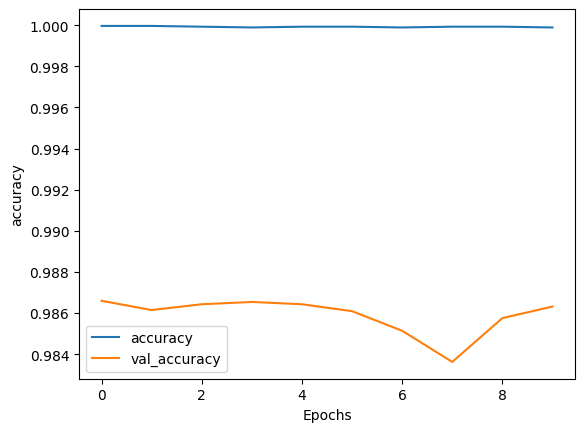

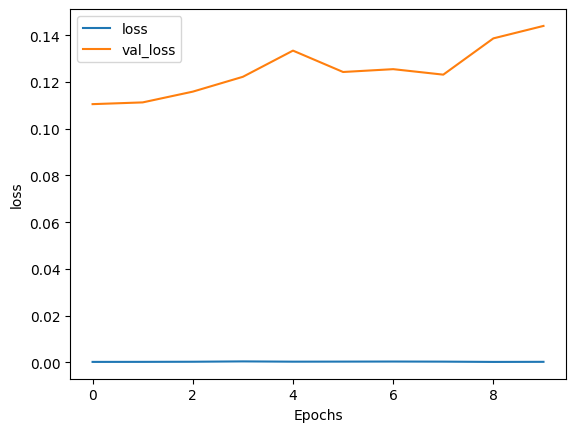

In [109]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")